In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mat

In [2]:
file_path = 'california_housing_test.csv'
df = pd.read_csv(file_path)
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


# ТОЧЕЧНЫЕ ГРАФИКИ

<Axes: xlabel='longitude', ylabel='latitude'>

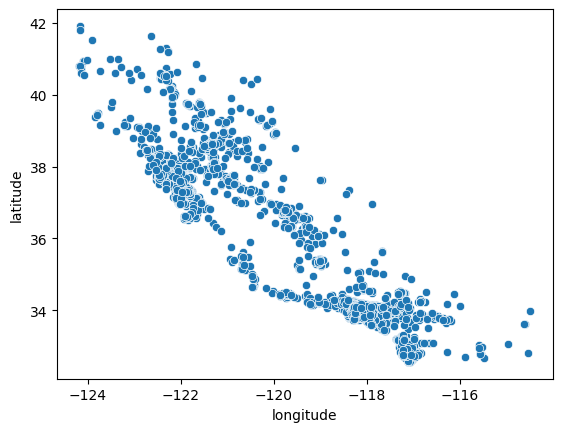

In [4]:
sns.scatterplot(data=df, x='longitude', y='latitude')

<Axes: xlabel='households', ylabel='population'>

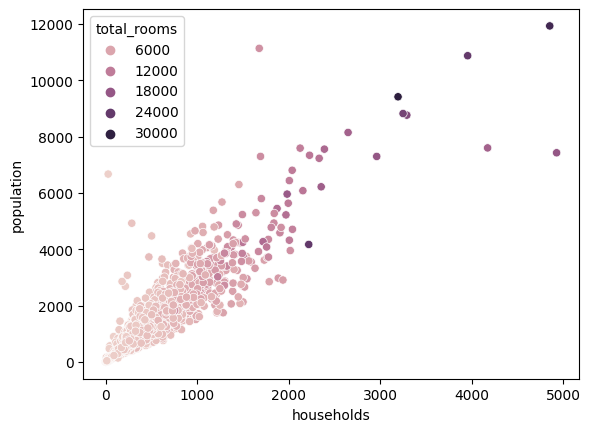

In [8]:
sns.scatterplot(data=df, x='households', y='population', hue='total_rooms')

<Axes: xlabel='households', ylabel='population'>

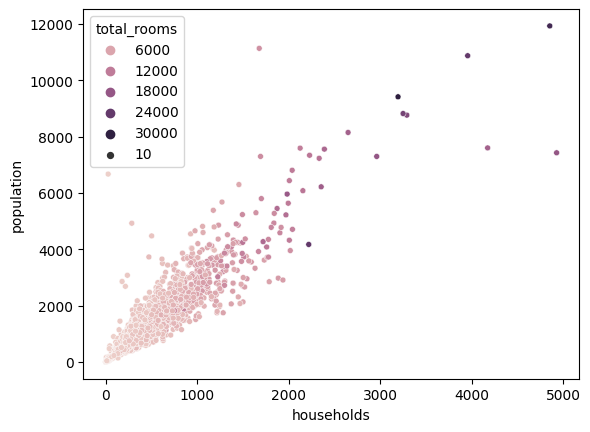

In [10]:
sns.scatterplot(data=df, x='households', y='population', hue='total_rooms', size=10)

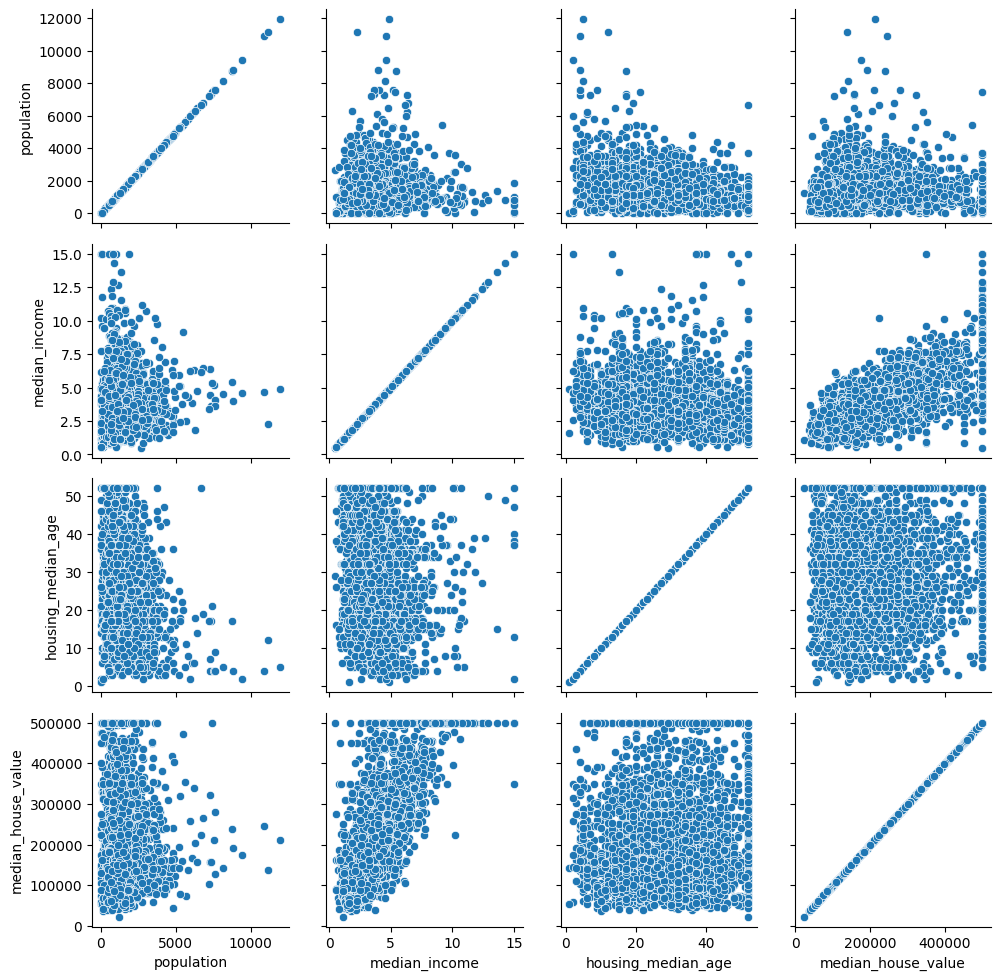

In [11]:
cols = ['population', 'median_income', 'housing_median_age', 'median_house_value', ]
g = sns.PairGrid(df[cols])
g.map(sns.scatterplot)

# ЛИНЕЙНЫЙ ГРАФИК

In [12]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.05,37.37,27.0,3885.0,661.0,1537.0,606.0,6.6085,344700.0
1,-118.30,34.26,43.0,1510.0,310.0,809.0,277.0,3.5990,176500.0
2,-117.81,33.78,27.0,3589.0,507.0,1484.0,495.0,5.7934,270500.0
3,-118.36,33.82,28.0,67.0,15.0,49.0,11.0,6.1359,330000.0
4,-119.67,36.33,19.0,1241.0,244.0,850.0,237.0,2.9375,81700.0
...,...,...,...,...,...,...,...,...,...
2995,-119.86,34.42,23.0,1450.0,642.0,1258.0,607.0,1.1790,225000.0
2996,-118.14,34.06,27.0,5257.0,1082.0,3496.0,1036.0,3.3906,237200.0
2997,-119.70,36.30,10.0,956.0,201.0,693.0,220.0,2.2895,62000.0
2998,-117.12,34.10,40.0,96.0,14.0,46.0,14.0,3.2708,162500.0


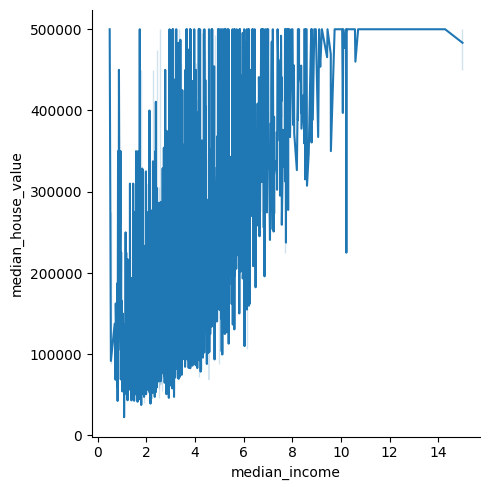

In [17]:
sns.relplot(x='median_income', y='median_house_value', kind='line', data=df)

# Гистограмма 

<Axes: xlabel='housing_median_age', ylabel='Count'>

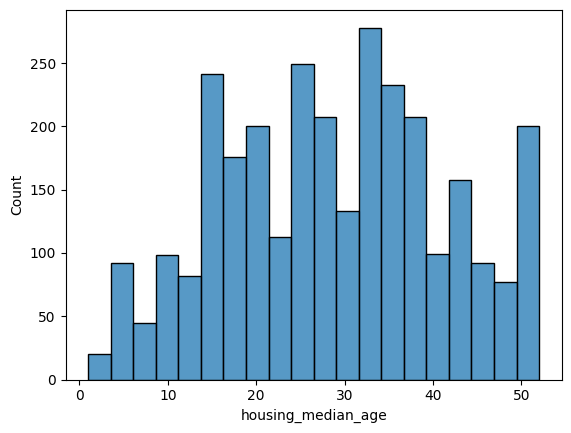

In [18]:
sns.histplot(data=df, x='housing_median_age')

<Axes: xlabel='median_income', ylabel='Count'>

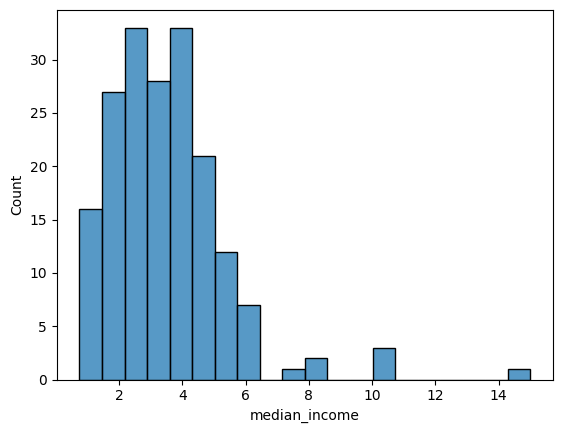

In [19]:
sns.histplot(data=df[df['housing_median_age'] > 50], x='median_income')

In [21]:
df.loc[df['housing_median_age'] <= 20, 'housing_median_age']

4       19.0
7       19.0
8       15.0
13      16.0
16      15.0
        ... 
2981    17.0
2984    13.0
2985    17.0
2991    13.0
2997    10.0
Name: housing_median_age, Length: 893, dtype: float64

In [22]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [23]:
df.loc[df['housing_median_age'] <= 20, 'age_group'] = 'Молодые'
df.loc[(df['housing_median_age'] > 20) & (df['housing_median_age'] <=50), 'age_group'] = 'Ср. возраст'
df.loc[df['housing_median_age'] > 50, 'age_group'] = 'Старшее поколение'

In [25]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'age_group'],
      dtype='object')

<Axes: xlabel='age_group'>

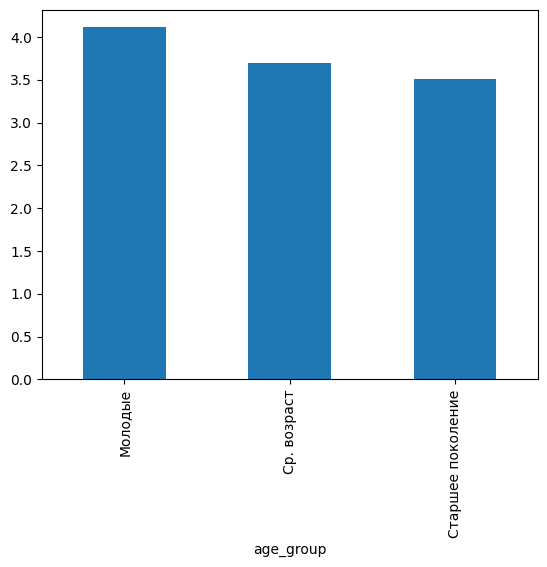

In [26]:
df.groupby('age_group').median_income.mean().plot(kind='bar')